<a href="https://colab.research.google.com/github/mkrisna211/UAS/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== SOAL 1: EKSPLORASI DATA ===
Jumlah data : 150
Jumlah fitur: 4

Nama fitur:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Distribusi kelas target:
Kelas 0 (setosa): 50 data
Kelas 1 (versicolor): 50 data
Kelas 2 (virginica): 50 data

Potensi permasalahan data:
- Skala fitur berbeda sehingga perlu scaling
- Tidak terdapat class imbalance
- Dataset bersih (tidak ada missing value)

=== SOAL 2: PREPROCESSING ===
Data training : 105
Data testing  : 45
Feature scaling menggunakan StandardScaler selesai

Alasan scaling penting:
- KNN berbasis jarak
- Scaling mencegah fitur tertentu mendominasi perhitungan

=== SOAL 3: EVALUASI MODEL KNN ===
Accuracy  : 91.11%
Precision : 92.98%
Recall    : 91.11%
F1-score  : 90.95%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    

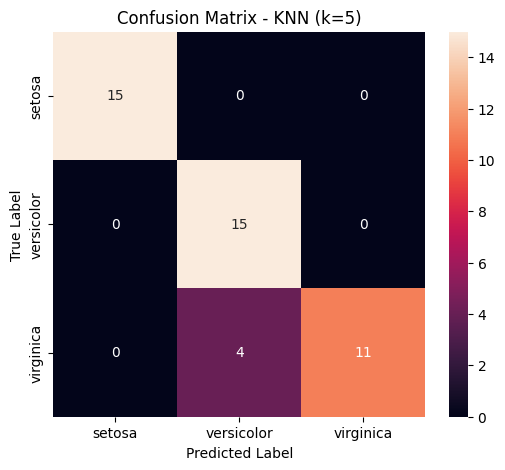

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ============================================
# SOAL 1 - LOAD & EKSPLORASI DATA
# ============================================

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("=== SOAL 1: EKSPLORASI DATA ===")
print("Jumlah data :", X.shape[0])
print("Jumlah fitur:", X.shape[1])

print("\nNama fitur:")
for feature in iris.feature_names:
    print("-", feature)

print("\nDistribusi kelas target:")
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Kelas {label} ({iris.target_names[label]}): {count} data")

print("\nPotensi permasalahan data:")
print("- Skala fitur berbeda sehingga perlu scaling")
print("- Tidak terdapat class imbalance")
print("- Dataset bersih (tidak ada missing value)")

# ============================================
# SOAL 2 - PREPROCESSING
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== SOAL 2: PREPROCESSING ===")
print("Data training :", X_train.shape[0])
print("Data testing  :", X_test.shape[0])
print("Feature scaling menggunakan StandardScaler selesai")

print("\nAlasan scaling penting:")
print("- KNN berbasis jarak")
print("- Scaling mencegah fitur tertentu mendominasi perhitungan")

# ============================================
# SOAL 3 - KNN
# ============================================

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100

print("\n=== SOAL 3: EVALUASI MODEL KNN ===")
print(f"Accuracy  : {accuracy:.2f}%")
print(f"Precision : {precision:.2f}%")
print(f"Recall    : {recall:.2f}%")
print(f"F1-score  : {f1:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# ============================================
# VISUALISASI - CONFUSION MATRIX
# ============================================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN (k=5)")
plt.show()
